<a href="https://colab.research.google.com/github/henriquesamuel/MVP/blob/main/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de pacotes

In [46]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as ms
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

# Carga de dataframe

In [47]:
#Buscando dataframe
filename = '/content/exams.csv'

#alterando cabaçalho
df = pd.read_csv(filename)
df.columns = ['Genero','Raça/etnia','Pais_edu','almoço', 'curso_prep', 'Pontos_matematica', 'Pontos_leitura', 'Pontos_redacao' ]

# Análise de dados

# Informações Gerais e Estatísticas Descritivas

In [48]:
# Mostra as dimensões do dataframe
df.shape

(1000, 8)

Existe um total de 1.000 registros e 8 atributos

In [49]:
# Mostra as informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Genero             1000 non-null   object
 1   Raça/etnia         1000 non-null   object
 2   Pais_edu           1000 non-null   object
 3   almoço             1000 non-null   object
 4   curso_prep         1000 non-null   object
 5   Pontos_matematica  1000 non-null   int64 
 6   Pontos_leitura     1000 non-null   int64 
 7   Pontos_redacao     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


As pontuações dos alunos são do tipo inteiro, enquanto os outros atributos são do tipo objeto 

In [50]:
# Mostra as 10 primeiras linhas do dataframe
df.head(10)

,Genero,Raça/etnia,Pais_edu,almoço,curso_prep,Pontos_matematica,Pontos_leitura,Pontos_redacao
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
5,male,group C,some high school,standard,none,68,57,54
6,female,group E,associate's degree,standard,none,82,83,80
7,female,group B,some high school,standard,none,46,61,58
8,male,group C,some high school,standard,none,80,75,73
9,female,group C,bachelor's degree,standard,completed,57,69,77


In [51]:
# Mostra as 10 últimas linhas do dataframe
df.tail(10)

,Genero,Raça/etnia,Pais_edu,almoço,curso_prep,Pontos_matematica,Pontos_leitura,Pontos_redacao
990,female,group C,some high school,standard,none,70,77,76
991,female,group A,associate's degree,standard,none,72,77,77
992,male,group A,associate's degree,free/reduced,completed,75,67,67
993,male,group D,some high school,standard,none,83,74,80
994,female,group B,associate's degree,standard,none,82,97,90
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62
999,male,group D,high school,standard,none,58,47,45


Após analisar o conjunto de registros iniciais e finais, percebe-se que 20% dos alunos dessa amostra não participaram de um curso preparatório

In [52]:
# Adionando nova coluna condicional onde média >= 70 -> "aprovado" caso contrário "reprovado"  
df['Media'] = df[['Pontos_matematica', 'Pontos_leitura', 'Pontos_redacao']].mean(axis=1)
df['Situacao'] = np.where(df['Media'] >= 70, 'Aprovado', 'Reprovado')

df.head()

,Genero,Raça/etnia,Pais_edu,almoço,curso_prep,Pontos_matematica,Pontos_leitura,Pontos_redacao,Media,Situacao
0,female,group D,some college,standard,completed,59,70,78,69.000000,Reprovado
1,male,group D,associate's degree,standard,none,96,93,87,92.000000,Aprovado
2,female,group D,some college,free/reduced,none,57,76,77,70.000000,Aprovado
3,male,group B,some college,free/reduced,none,70,70,63,67.666667,Reprovado
4,female,group D,associate's degree,standard,none,83,85,86,84.666667,Aprovado


O atributo "Situação" se enquadra na categoria de problemas de aprendizado supervisionado - Classificação

In [53]:
# Verificando valores missing
df.isnull().sum()

Genero               0
Raça/etnia           0
Pais_edu             0
almoço               0
curso_prep           0
Pontos_matematica    0
Pontos_leitura       0
Pontos_redacao       0
Media                0
Situacao             0
dtype: int64

<Axes: >

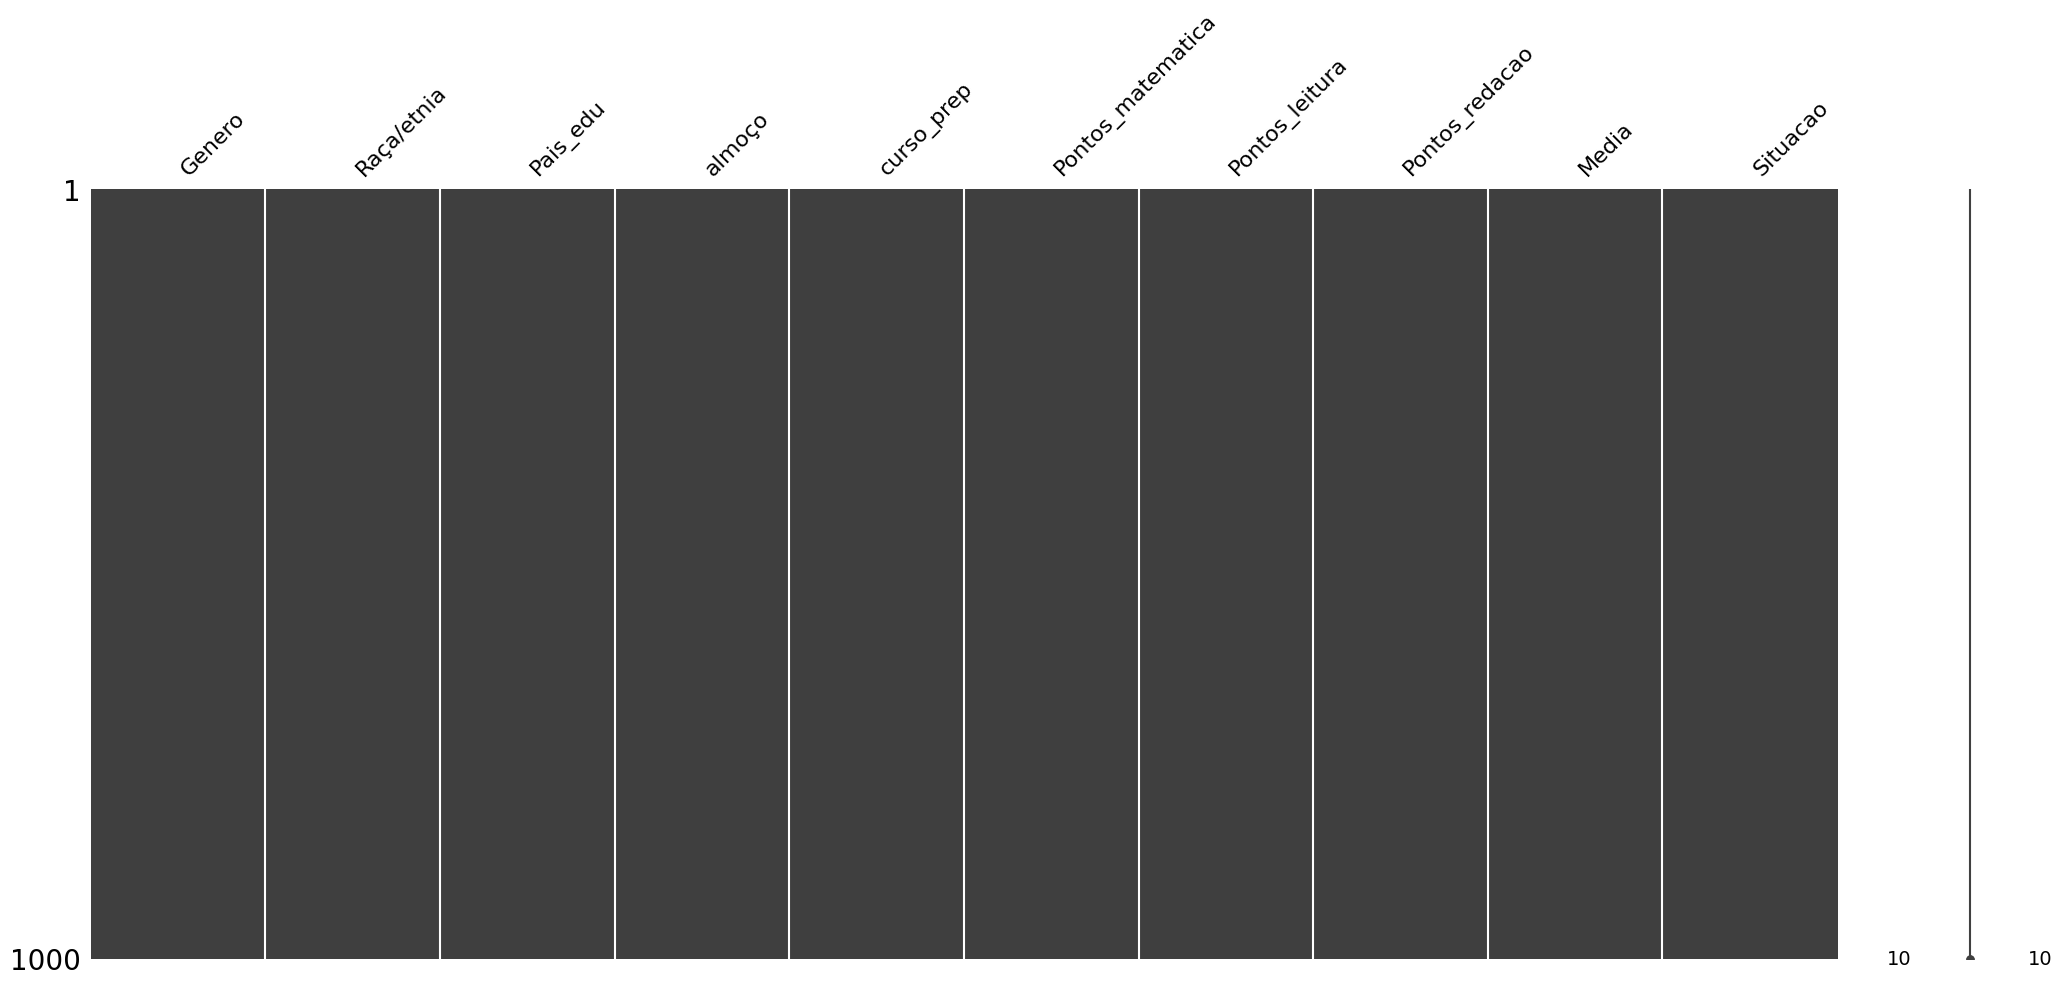

In [54]:
# exibindo visualização matricial da nulidade do dataframe
ms.matrix(df)

Não existem valores faltantes neste dataset

In [56]:
# Resumo estatístico do dataframe
df.describe()

,Pontos_matematica,Pontos_leitura,Pontos_redacao,Media
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000,69.110667
std,15.250196,14.107413,15.025917,14.027856
min,15.000000,25.000000,15.000000,20.000000
25%,58.000000,61.000000,59.000000,59.583333
50%,68.000000,70.500000,70.000000,69.666667
75%,79.250000,80.000000,80.000000,79.333333
max,100.000000,100.000000,100.000000,100.000000


1.   Os alunos tem melhor desempenho em matérias de humanas.
2.   Matéria com menor dispersão de pontos é a de Leitura.
3.   Matéria com maior dispersão de pontos é a de Matemática.
4.   Ocorreram casos de nota mámixa em todas as Matérias.

In [57]:
valor_max = 100
cont_mat = (df['Pontos_matematica'] == valor_max).sum()
cont_lei = (df['Pontos_leitura'] == valor_max).sum()
cont_red = (df['Pontos_redacao'] == valor_max).sum()
print('\nO número de alunos que alcançaram a nota máxima em matematica foi ', cont_mat)
print('\nO número de alunos que alcançaram a nota máxima em leitura foi ', cont_lei)
print('\nO número de alunos que alcançaram a nota máxima em redação foi ', cont_red)


O número de alunos que alcançaram a nota máxima em matematica foi  9

O número de alunos que alcançaram a nota máxima em leitura foi  10

O número de alunos que alcançaram a nota máxima em redação foi  13


# Visualizações Unimodais

<Axes: xlabel='curso_prep', ylabel='Media'>

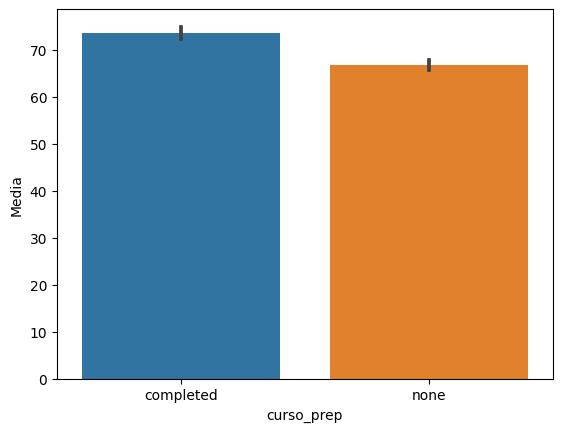

In [80]:
# Plotando o gráfico de barras cursos preparatórios
sns.barplot(x='curso_prep', y='Media',data=df)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'some college'),
  Text(1, 0, "associate's degree"),
  Text(2, 0, 'some high school'),
  Text(3, 0, "bachelor's degree"),
  Text(4, 0, "master's degree"),
  Text(5, 0, 'high school')])

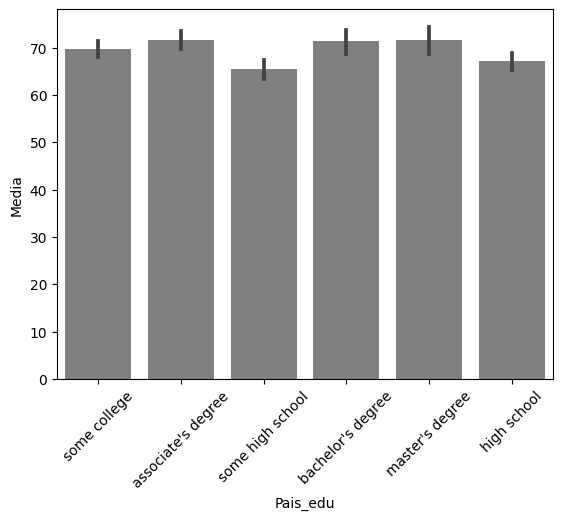

In [78]:
# Plotando o gráfico de barras nivel de educação dos pais
sns.barplot(x='Pais_edu', y='Media',hue=  ,data=df)

# Ajustando rótulos
plt.xticks(rotation=45)

Quanto maior o nivel de escolaridade dos pais maior o desempenho

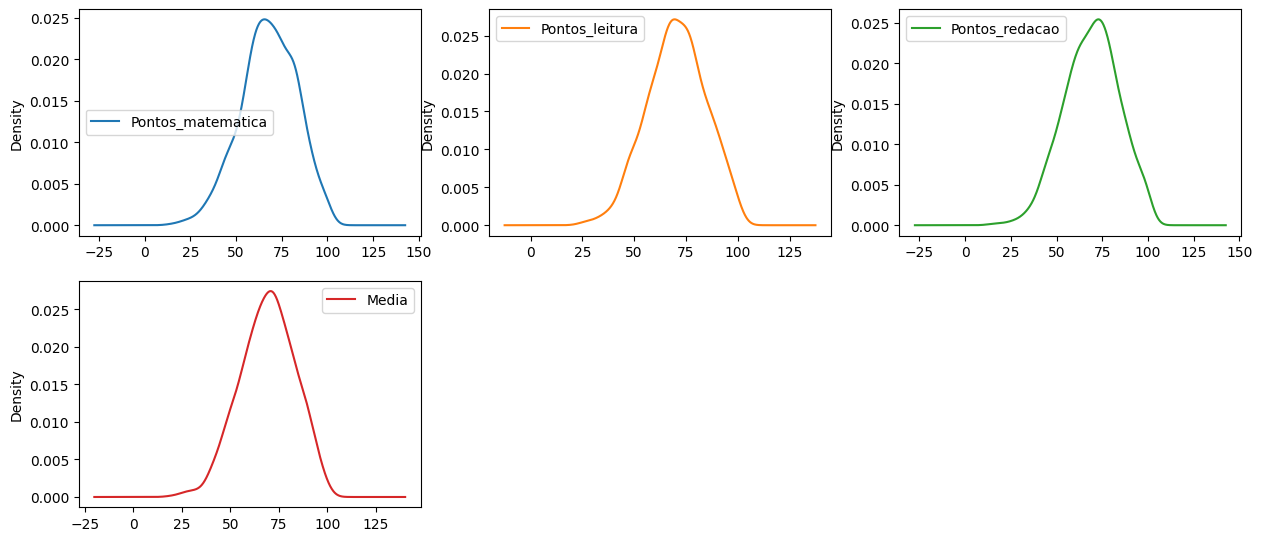

In [59]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

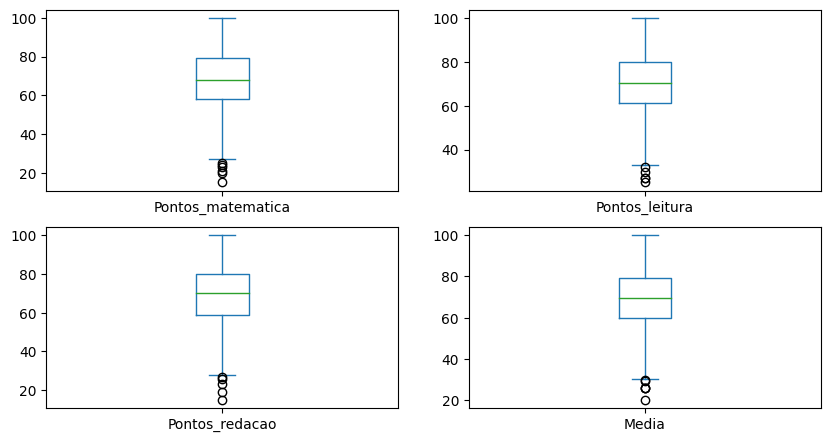

In [61]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,2), sharex = False, sharey = False, figsize = (10,8))
plt.show()

# Visualizações Multimodais

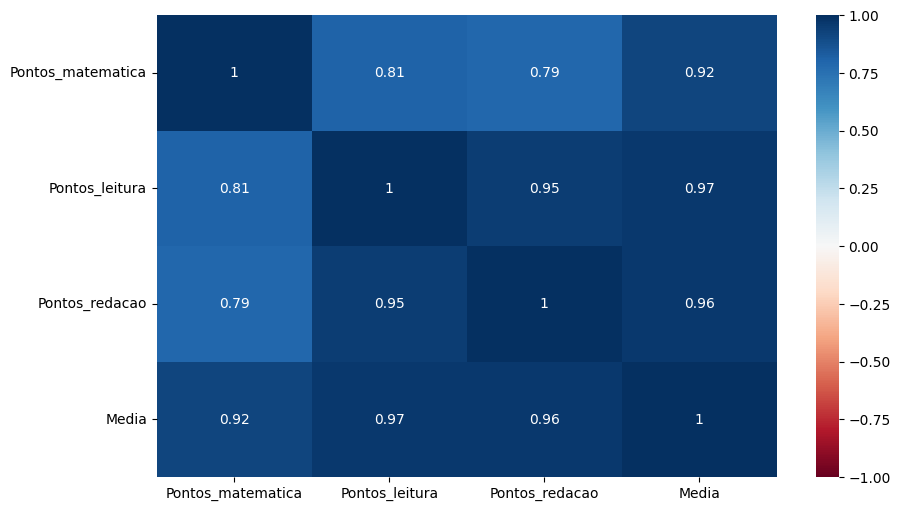

In [62]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Podemos verificar que a pontuação em leitura está altamente relacioanada com os pontos de redação

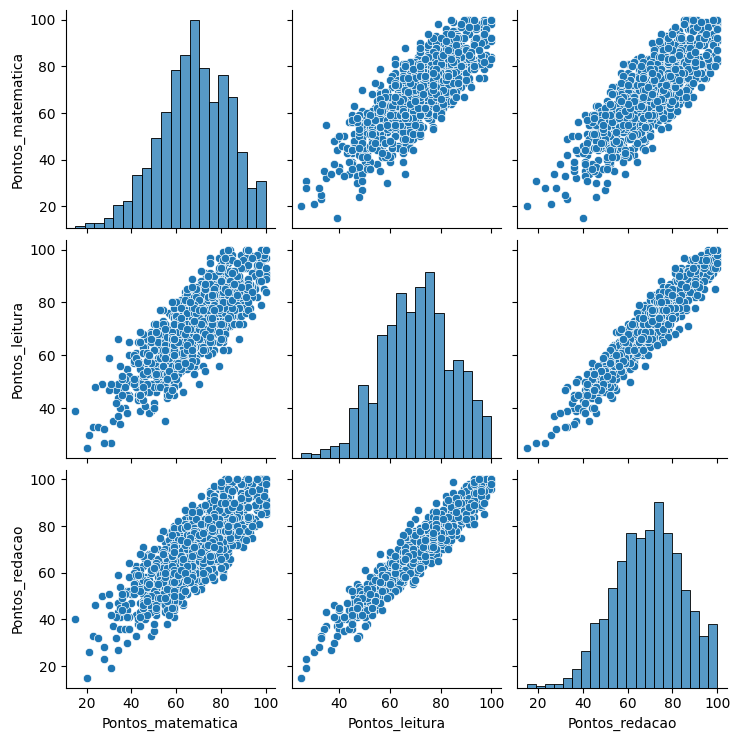

In [18]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(df)

Podemos verificar a baixa dispersão da materia "Leitura"

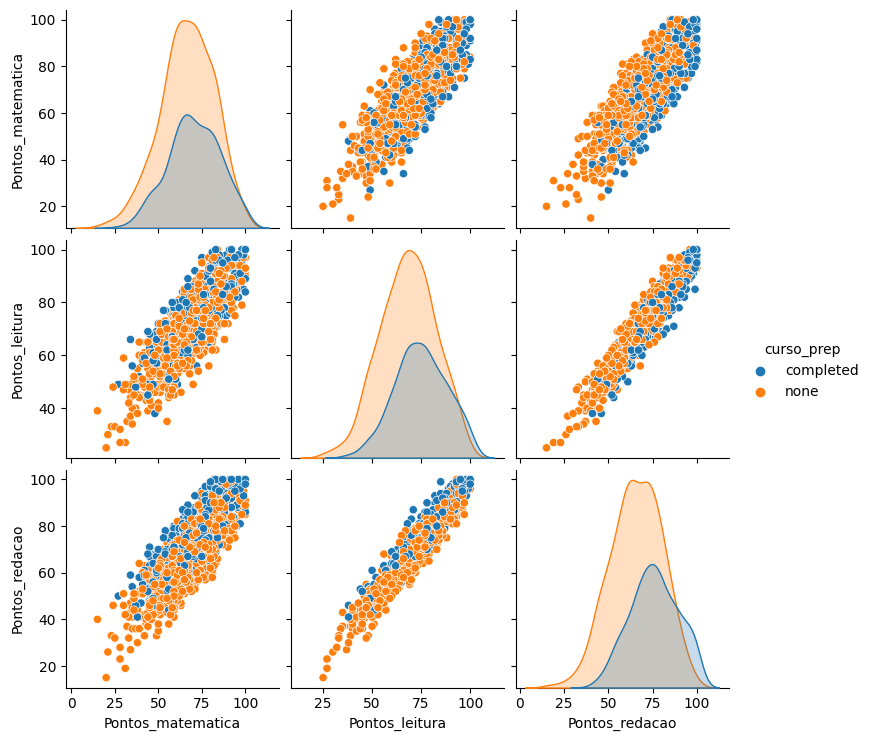

In [ ]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(df, hue = "curso_prep", height = 2.5);

# Pandas Profiling 

In [ ]:
# Instalando o pandas profiling (executar apenas na 1a vez, depois comente esta linha)
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 22.6 MB 13.5 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 89.7 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=a0f203398fb1774d4e5b8ebc3840fc2d2ff66aaabf48a48d9bd2199e153025bc
  Stored in directory: /tmp/pip-ephem-wheel-ca

In [ ]:
# Import
from pandas_profiling import ProfileReport

In [ ]:
# geração do report
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':False}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

De acordo com a relação de Pearson verificamos que os atributos mais relacionados a pontuação são:


1.   Curso Preparatório
2.   Almoço
3.   Genero



